# Graphical Exploratory Data Analysis

## introduction to exploratory data analysis

- EDA : the process of organizing, plotting, and summarizing a dataset.

## plotting a histogram

- data: pandas and numpy array can be used interchangeably.
- bins: bin edges or the number of bins/ **Squarer root Rule**: commonly-used rule of thumb for choosing number of bins 
- searborn: sns.set()
- label: always write labels
- \_ = plt.hist : There is no real need to use the _. _ is used, by convention, when you want to do something but don't really care about the variable it is assigned to. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# load iris data from sklearn
data = datasets.load_iris()

# convert iris data into dataframe
iris_df = pd.DataFrame(data = data.data, columns = data.feature_names )
iris_df['target'] = data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# filter only versicolor's petal length
versicolor_petal_length = iris_df.loc[(iris_df['target'] == 1), 'petal length (cm)']
type(versicolor_petal_length)

pandas.core.series.Series

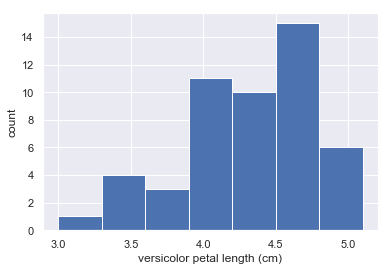

In [3]:
# plot histogram

# set default Seaborn style
sns.set()

# number of bins: the square root of number of data points
n_bins = np.sqrt(len(versicolor_petal_length))

# convert number of bins to integer
n_bins = int(n_bins)

# plot histogram of versicolor petal length
_ = plt.hist(versicolor_petal_length, bins = n_bins)

# label x axis, y axis
_ = plt.xlabel('versicolor petal length (cm)')
_ = plt.ylabel('count')

# show histogram
plt.show()

## plot all of your data: Bee Swarm Plots

drawbacks of histogram: 
1. **Binning Bias** a plot looks different depending on the number of bins.
2. histogram doesn't allow to plot all of the data.

to remedy this problem, we can make a **bee swarm plot** or **swarm plot**.
- x axis : categorical data
- y axis : numerical data
> the data are spread in x to make them visible, but their precise location along the x axis is unimportant.
**no binning bias, all data displayed**

In [4]:
# view iris data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# view target names 
print(data.target_names)

# add new column with species' name
iris_df['species'] = iris_df.target.replace([0,1,2], ['setosa', 'versicolor', 'virginica'])

# see if conversion to species names is done correctly.
assert iris_df.loc[iris_df['target'] == 0, 'species'].unique() == ['setosa']
assert iris_df.loc[iris_df['target'] == 1, 'species'].unique() == ['versicolor']
assert iris_df.loc[iris_df['target'] == 2, 'species'].unique() == ['virginica']

['setosa' 'versicolor' 'virginica']


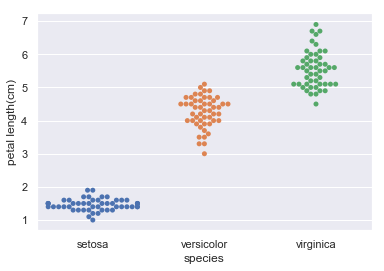

In [6]:
# create a swarm plot with seaborn's default settings

# plot data distribution of petal length for each species
_ = sns.swarmplot(x = 'species', y = 'petal length (cm)', data = iris_df)

# label
_ = plt.xlabel('species')
_ = plt.ylabel('petal length(cm)')

# display plot
plt.show()

virginica petals **tend to be** the longest, and I. setosa petals tend to be the shortest of the three species.

**Notice** that we said "tend to be." Some individual I. virginica flowers may be shorter than individual I. versicolor flowers. It is also possible that an individual I. setosa flower may have longer petals than in individual I. versicolor flower, though this is highly unlikely, and was not observed by Anderson.

## plot all of your data: ECDFs
- problem of swarm plot: the edges have overlapping data points, which was necesary in order to fit all points into the plot. 
- **ECDF** (Empircal Cumulative Distribution Function): plot a value on x-axis and where a value stands in percentage.

- **CDF VS ECDF**
while a CDF is a hypothetical model of a distribution, the ECDF models empirical (i.e. observed) data.

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y 
    y = np.arange(1, n + 1) / n
    
    return x, y

In [8]:
# pick petal length by species
setosa_petal_length = iris_df.loc[iris_df['species'] == 'setosa', 'petal length (cm)']
versicolor_petal_length = iris_df.loc[iris_df['species'] == 'versicolor', 'petal length (cm)']
virginica_petal_length = iris_df.loc[iris_df['species'] == 'virginica', 'petal length (cm)']

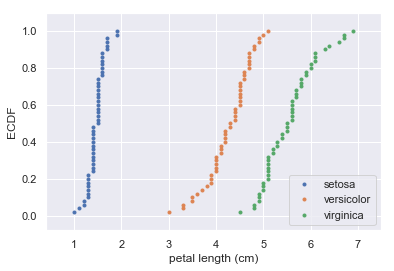

In [9]:
# compute ECDFs
x_set, y_set= ecdf(setosa_petal_length)
x_ver, y_ver = ecdf(versicolor_petal_length)
x_vir, y_vir = ecdf(virginica_petal_length)

# plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_ = plt.plot(x_ver, y_ver, marker = '.', linestyle = 'none')
_ = plt.plot(x_vir, y_vir, marker = '.', linestyle = 'none')

# annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'))
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# display the plot
_ = plt.margins(0.10)
plt.show()

Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

# Quantitative Exploratory Data Analysis

## introduction to summary statistics: the sample mean & median
- mean's drawback: heavily influenced by outliers
    - solution: median immune to extreme data
- median: the middle value of data

In [10]:
# mean : average value
# see the mean value of setosa's petal length
print('Mean:', np.mean(setosa_petal_length))

# median: middle value
# see the median value of setosa's petal length
np.median(setosa_petal_length)
print('Median:', np.median(setosa_petal_length))

Mean: 1.4620000000000002
Median: 1.5


## percentiles, outliers, box plot
- ECDF, boxplot show percentiles
- outliers: no single definition, but more than 2 IQRs away from the median is a common criterion
> outliers 2 IQRs away from the median <br>
> boxplots shows all individual points which are outside of the whiskers 

In [11]:
# specify array of percentiles: percentiles
# 25th, 80th
percentiles = np.array([25, 80])

# compute percentiles: ptiles_se
ptiles_set = np.percentile(setosa_petal_length, percentiles)

# view percentiles of setosa petal length
ptiles_set

array([1.4, 1.6])

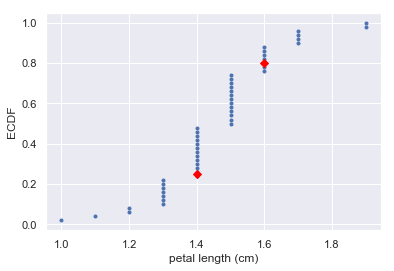

In [12]:
# plot the ecdf
_ = plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# overlay percentiles as red diamonds
_ = plt.plot(ptiles_set, percentiles/100, marker = 'D', linestyle = 'none', color = 'red')

# show the plot
plt.show()

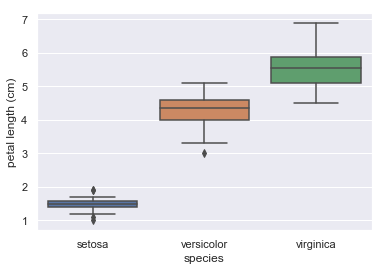

In [13]:
# create box plot with seaborn's default settings
_ = sns.boxplot(x = 'species', y = 'petal length (cm)', data = iris_df)

# label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# show the plot
plt.show()

## variance and standard deviation
- variance: the mean squared distance of the data from their mean (infomaly, **a measure of the spread of data**)
- standard deviation: the square root of variance (the spread adjusted to the unit level of data)

In [14]:
# compute the variance
var = np.var(virginica_petal_length)

# compute the standard deviation
std = np.sqrt(var)

print('Variance: ', var, ' (cm\u00B2)', '\nStandard Deviation: ', std, ' (cm)')

# comput the standard deviation
assert np.sqrt(np.var(virginica_petal_length)) == np.std(virginica_petal_length)

Variance:  0.2984960000000002  (cm²) 
Standard Deviation:  0.5463478745268441  (cm)


## covariance and the pearson correlation coefficient
- covariance and the pearson correlation coefficient come in handy when seeing the relationship between two features
- **covariance (dimentional)**
> average of all (feature 1 - feature 1 mean) * (feature 2 - feature 2 mean)
> both distance from mean positive or negative -> covariance is positive = two features are positively correlated. <br>
> only one of distance from mean positive or negative -> covariance is negative = two features are negatively correlated.  
- **the pearson correlation coefficient (dimentionless, not have any unit, more generally applicable measure)**
> range from -1 to 1 <br>
> covariance / product of features' std <br>
>(feature 1's std * feature 2's std) <br>
<img src = 'covariance_calculation.png' width = 500></img> <br>
<img src = 'pearson_correlation_calculation.png' width = 500></img>

In [15]:
# pick setosa's peta width to get covariance value
setosa_petal_width = iris_df.loc[iris_df['species'] == 'setosa', 'petal width (cm)']

In [16]:
# compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(setosa_petal_length, setosa_petal_width)

# print covariance matrix
print('np.cov returns a 2D arrary : \n', covariance_matrix, '\n')
print('[0,1], [1,0] indicate covariances : ', covariance_matrix[0,1])
print('[0,0] indicates the variance of x data, [1,1] indicate that of y. \n')
print('the variance of x (relation between x, x): ', covariance_matrix[0,0], '\n'
     'the variance of y (relation between y, y): ', covariance_matrix[1,1])


np.cov returns a 2D arrary : 
 [[0.03015918 0.00606939]
 [0.00606939 0.01110612]] 

[0,1], [1,0] indicate covariances :  0.006069387755102041
[0,0] indicates the variance of x data, [1,1] indicate that of y. 

the variance of x (relation between x, x):  0.030159183673469397 
the variance of y (relation between y, y):  0.011106122448979598


/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


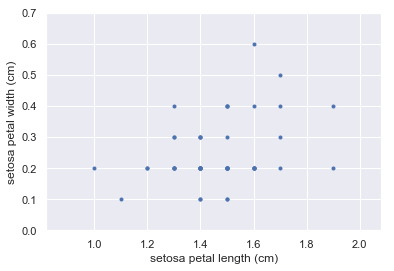

In [17]:
# plot two data set
_ = plt.plot(setosa_petal_length, setosa_petal_width, marker = '.', linestyle = 'none')
_ = plt.xlabel('setosa petal length (cm)')
_ = plt.ylabel('setosa petal width (cm)')

# display
plt.margins(0.2)
plt.show()

In [18]:
# compute the pearson correlation coefficient

cov = covariance_matrix[0,1]
prod_std = np.std(setosa_petal_length) * np.std(setosa_petal_width)
corr_mat_1 = cov/prod_std

corr_mat_2 = np.corrcoef(setosa_petal_length, setosa_petal_width)[0,1]

print(corr_mat_1, corr_mat_2, '\n')
print('the difference is due to the parameter ddof(delta degrees of freedom) of np.std() defaults to 0, while 1 is used in np.corrcoef()')

0.33839800082052907 0.33163004080411845 

the difference is due to the parameter ddof(delta degrees of freedom) of np.std() defaults to 0, while 1 is used in np.corrcoef()


In [19]:
# np.std ddof = 1

# compute the pearson correlation coefficient

cov = covariance_matrix[0,1]
prod_std = np.std(setosa_petal_length, ddof = 1) * np.std(setosa_petal_width, ddof = 1)
corr_mat_1 = cov/prod_std

corr_mat_2 = np.corrcoef(setosa_petal_length, setosa_petal_width)[0,1]

print(corr_mat_1, corr_mat_2)

0.3316300408041185 0.33163004080411845


# Thinking Probabilistically - Discrete Variables
- with different sample of data, its mean statistical information can be different. 
> what would the mean value of next year's applicants' age?
- therefore, when we convey statisical information, let's state it is of probability.
- "It's is more probable to be close to what we got in past few year's applicants' mean age.

## random number generator and hacker statistics
- **hacker statistics** : Uses simulated repeated measurements to compute probabilities


## the np.random module and Bernoulli trials (coin flips)

In [20]:
# simulate the games of chance by Pascal and others in the 17th century

# 4 coin flips
# what is the change of having all 4 heads?

# make the code reproducible
np.random.seed(2)

# generate random 4 numbers between 0 and 1 using np.random.random(size = )
flips = np.random.random(size = 4)

# mark head
heads = flips < 0.5

# True = 1
heads_sum = np.sum(heads)

print(heads_sum)

3


In [21]:
# do above practice for 1000 times
np.random.seed(3)

num_all_heads = 0
for _ in range(1000):
    # generate random 4 numbers between 0 and 1 using np.random.random(size = )
    flips = np.random.random(size = 4)
    
    # mark head
    heads = flips < 0.5
    
    # True = 1
    heads_sum = np.sum(heads)

    if heads_sum == 4:
        num_all_heads += 1
        
# compute the change of all 4 heads 
num_all_heads / 1000

0.059

## how many defaults might we expect?

In [22]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    
    # initialize number of success: n_success
    n_success = 0
    
    # perform trials
    for _ in range(n):
        result = np.random.random()
        if result < p:  # e.g. if the success probability (p) is 0.3, when result is 0.2, success is more probable.
            n_success += 1
        
    return n_success

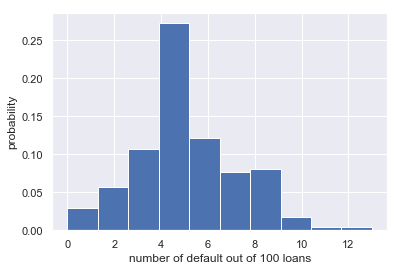

In [23]:
# perform bernoulli trials for 100 loans 
# with the probability of default (p = 0.05) and repeat that 1000 times

# seed random number generator
np.random.seed(4)

# intialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

for i in range(1000):
    n_default = perform_bernoulli_trials(100, 0.05)
    n_defaults[i] = n_default

# plot histogram
# set density as True so that the height of the bars of the histogram indicate the probability
_ = plt.hist(n_defaults, density = True)
_ = plt.xlabel('number of default out of 100 loans')
_ = plt.ylabel('probability')

# view plot
plt.show()

## will bank fail?
- supposed that the bank would fail if more than 10 became defaults out of 100 loans, what would the chance that bank will fail?

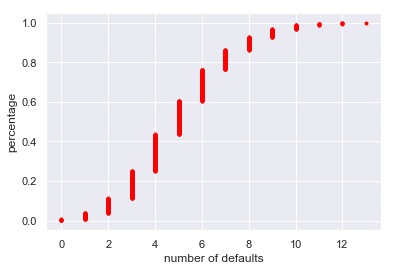

Probability of losing money :  0.033


In [24]:
# compute ECDF
x, y = ecdf(n_defaults)

# plot ECDF
_ = plt.plot(x, y, marker = '.', linestyle = 'none', color = 'red')
_ = plt.xlabel('number of defaults')
_ = plt.ylabel('percentage')

# show the plot
plt.show()

# the chance that the bank will fail (more than 10 or more defaults out of 100 loans)
n_lose_money = np.sum(n_defaults >= 10)

print('Probability of losing money : ', n_lose_money/len(n_defaults))

### 'density = True' argument in histogram
- convert counts into probability in y axis.
> 3 / (12 * 1)  <br>
> 3 occurrences / (total occurrence 12 * interval unit(more than 1 less than 2) <br>
> 3 / (12 * 2)  <br>
> here interval is 2

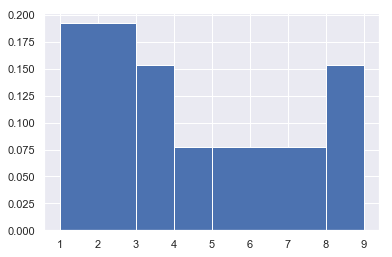

In [25]:
# example 
oc = [1,1,1,2,2,3,3,4,5,6,7,8,8]
bin = [1,3,4,5,8,9]
plt.hist(oc, bins = bin, density = True)
plt.show()

In [26]:
np.diff(bin)

array([2, 1, 1, 3, 1])

In [27]:
np.array([5,2,1,3,2]) / (13 * np.diff([[1,3,4,5,8,9]]))

array([[0.19230769, 0.15384615, 0.07692308, 0.07692308, 0.15384615]])

## probability distributions and stories: The Binomial distribution
- **probability mass function (PMF)**
> - the set of probabilities of discrete outcomes <br>

**Discrete & Uniformly distributed probability** <br>
the outcomes are discrete because only certain vaules may be attained; you cannot roll a 3.7 with a die. <br>
each result has the same probability, 1/6 <br>
<img src = 'discrete_uniform_pmf.png' width = 400></img>

**Binomial distribution** <br>
(such as previous 4 coin flip) The number r of heads in 4 coin flips with probability 0.5 of heads is **binominally distributed**. <br>
<img src = 'probability_distribution_1.png'></img> <br>
<img src = 'probability_distribution_2.png'></img>

In [28]:
# sampling from the binomial distribution

# 4 coin flips with 10 times simulation
np.random.binomial(n = 4, p = 0.5, size = 10)

array([1, 3, 3, 2, 1, 3, 2, 4, 2, 2])

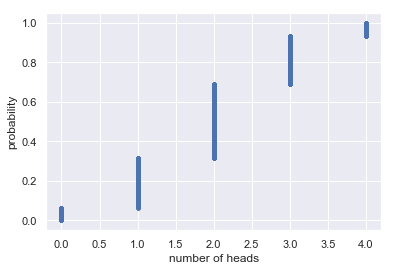

In [29]:
# seed random number generator
np.random.seed(4)

# 4 coin flips with 10,000 samples
samples = np.random.binomial(n = 4, p = 0.5, size = 10000)

# ecdf
x, y = ecdf(samples)

# plot
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of heads')
_ = plt.ylabel('probability')

# show the plot
plt.show()

[-0.5  0.5  1.5  2.5  3.5  4.5]


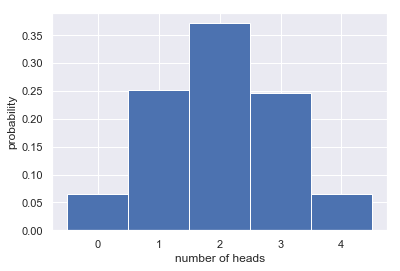

In [30]:
# nice looking PMF requires a bit of matplotlib trickery

# compute bin edges: bins
# max is 4, add 1.5 to have element until 5 and subtract 0.5 
# to have the bins centered on the integers
bins = np.arange(0, max(samples) + 1.5) - 0.5
print(bins)

# generage histogram
_ = plt.hist(samples, density = True, bins = bins)
_ = plt.xlabel('number of heads')
_ = plt.ylabel('probability')

# view
plt.show()

## poisson process and the poisson distribution
When we have **rare events (low p, high n)**, the Binomial distribution is Poisson.

it derived from **arrival of buses in Poissonville**
- David MacKay describe a town called Poissonville where the buses have a very erratic schedule.
- amount of time you have to wait for a bus is completely independent of when the previous bus arrived.
> x = the number of arrivals in a given amount of time <br>
> n = average arrival of buses e.g. 6 buses a hour <br>
> y = probability <br>
> "the number x of arrivals of bus in Poissonville in one hour 
<br> with average 6 arrivals per hour is Poisson distributed."

**poisson process**
- the timing of **the next event is completely independent of when the previous event happened.**
- examples
> - Natural births in a given hospital
> - Hit on website during a given hour
> - Meteor strikes
> - Molecular collison in a gas
> - Aviation incidents
> - Buses in Poissonville

## relationship between Binomial and Poisson distribution

In [31]:
# draw 10000 samples out of Poisson distribution: samples_poisson

# average 10, number of sample 10000 
samples_poisson = np.random.poisson(10, 10000)

# print the mean and standard deviation
print('Poisson:\n', 'mean: ', np.mean(samples_poisson), '\nstandard deviation: ', np.std(samples_poisson))

Poisson:
 mean:  10.012 
standard deviation:  3.1748788953281357


In [32]:
# binomial distribution

# number of trials
n  = [20, 100, 1000]

# success probability
p = [0.5, 0.1, 0.01]

# draw 10,000 samples for each n, p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size = 10000)
    
    # print results
    print('trial(n):', n[i], 'success rate(p)', p[i], 'binom:', np.mean(samples_binomial), np.std(samples_binomial))

trial(n): 20 success rate(p) 0.5 binom: 10.0256 2.278978859050693
trial(n): 100 success rate(p) 0.1 binom: 10.0025 2.9958794618609077
trial(n): 1000 success rate(p) 0.01 binom: 10.0191 3.1614134797586977


**The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.**

# Thinking Probabilistically - Continuous Variables

## Probability Density Function (PDF)
- the probability set for continuous quantities(23.45, 10.23445....), (not discrete 1,2,4,5)
- example
> - speed of light
- continuous analog to the PMF
- in PDF graph, the areas under the PDF give probabilities. <br>
> the probability of measuring that the speed of light is greater than 30,000 km/s is 3% (area below)

<img src = 'normal_pdf.png' width = 500></img>

- calculation of area: **CDF**
> the probability that x value is more than a certain number = 1 - CDF of a certain number

## introduction to the Normal Distribution

**Normal Distribution** <br>
describe a continous variable whose PDF has a single symmetric peak.

**Parameters of Normal Distribution: Mean, Standard Deviation**
- mean: determines where center of the peak is
- standard deviaton: a measure of how wide the peak is or how spread out the data are <br>
<img src = 'param_normal_distribution.png' width = 500></img>

**Remember mean and standard deviation are the names of the parameters of the Normal distribution, not mean , std computed from the data.**
- mean, std of Normal Distribution != np.mean(data), np.std(data)

**Compare ECDF of the date to CDF of the Normal distribution**
- unlike histogram, CDF doesn't have binnig bias, so it is easy to see if the data is normal distribution by comparing theoretical CDF.

## the normal PDF (probability density function)

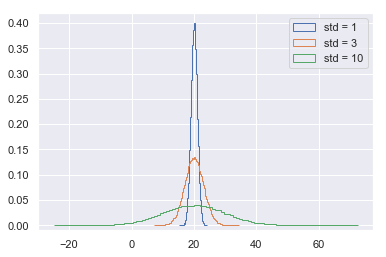

In [36]:
# create normal distribution sales
sample1 = np.random.normal(20, 1, size = 100000)
sample3 = np.random.normal(20, 3, size = 100000)
sample10 = np.random.normal(20, 10, size = 100000)

# plot histograms
_ = plt.hist(sample1, bins = 100, normed = True, histtype = 'step')
_ = plt.hist(sample3, bins = 100, normed = True, histtype = 'step')
_ = plt.hist(sample10, bins = 100, normed = True, histtype = 'step')

# make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

## the normal CDF (culmulative density function)

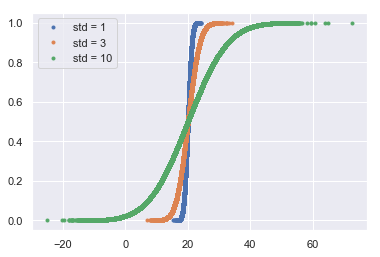

In [37]:
# generate CDFs
x_1, y_1 = ecdf(sample1)
x_3, y_3 = ecdf(sample3)
x_10, y_10 = ecdf(sample10)

# plot CDF
_ = plt.plot(x_1, y_1, marker = '.', linestyle = 'none')
_ = plt.plot(x_3, y_3, marker = '.', linestyle = 'none')
_ = plt.plot(x_10, y_10, marker = '.', linestyle = 'none')

# make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.show()

## the normal distribution: Properties and warnings
- normal distribution often referred to as the Gaussian distribution
- warning: 
> 1. often times things you may think are Normally distributed are not. 
> 2. normal distribution has lightness of its tail(= no outliers), but in reality, the data tends to have outliers, so in this case, normal distribution might not be the best description of your data.

In [45]:
# after you check that the data is normal distribution by comparing cdf and ecdf

# generate a million samples out of the normal distribution: samples
mean = 149.22101123595507
std = 1.627816471774816
samples = np.random.normal(mean, std, size = 1000000)

# count the occurrence faster than 144 seconds
faster_cases = np.sum(samples < 144)
prob = faster_cases/ 1000000

print('probability of besting 144 km/s:', round(prob * 100, 2), '%')

probability of besting 144 km/s: 0.07 %


## the exponential distribution
- the waiting time between arrivals of a poisson process (rare event) is exponentially distributed.
- if a certain incident can be described as poisson process (independent of previous incident), the waiting time should be exponentially distributed.
- it has a single parameter, **mean waiting time**, not peak

- testing whether or not data distribution is exponential
> comparing ecdf of data with theorectical cdf of exponential distribution


## how long must we wait to see a no-hitter and then a batter hit the cycle?

In [52]:
# define function
def successive_poisson(tau1, tau2, size = 1):
    """Compute time for arrival of 2 successive Poisson processes."""
    
    # draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size = size)
    
    # draw samples out of second exponetial distribution: t2
    t2 = np.random.exponential(tau2, size = size)
    
    return t1 + t2

In [50]:
# see how np.random.exponential() work
np.random.exponential(3, size = 10)

array([1.02648576, 5.55237595, 2.65715389, 2.25611315, 0.59196502,
       2.37921824, 1.43048234, 2.82152474, 2.16035654, 4.1700677 ])

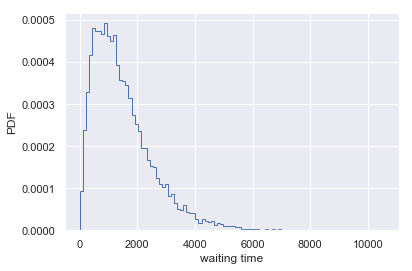

In [54]:
# get waiting_time to see a no-hitter and then a batter hit the cycle

# the mean waiting time for a no-hitter: 764 games
# the mean waiting time for hitting the cycle: 715 games
# generate 10,000 samples
wating_times = successive_poisson(764, 715, size = 10000)

# make the histogram
_ = plt.hist(wating_times, bins = 100, density = True, histtype = 'step')

# label axes
_ = plt.xlabel('waiting time')
_ = plt.ylabel('PDF')

plt.show()

 Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. 